In [93]:
!pip install otter-grader

In [94]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment2_Logistic_Regression.ipynb")

# CS385/CSD3185/CSD3186: Assignment 2 Logistic Regression

## Deliverables
Your submission for this assignment should be __ONE__ file - a zip file generated by the `grader.export(_)` function down below under 'Submission'. This function will auto create the zip file which contains this particular completed notebook file for you.  

Subsequently, rename your zip file like this: __coursecode_A2_your_full_name.zip__  
Eg. CS385_A2_john_doe.zip  

To complete this assignment, you should follow instructions in Section Tasks.

## IMPORTANT! READ THIS BEFORE STARTING...
- DO NOT delete existing cells, but you can add more cells in between.
- DO NOT modify the content of the existing cells unless otherwise stated.
- Run the cell with `grader.check(_)` to check your solutions whenever you have completed each tasks.
- Follow the file naming convention for the zip file as spelled out above strictly.
- DO NOT rename this notebook file. It shall be 'Assignment2_Logistic_Regression.ipynb'. 

Please adhere strictly to the instructions as stated above as failure to do so might result in deduction of marks by the autograder.
___

## Topics Covered
**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable takes on one of two possible values, typically coded as 1 (e.g., yes, success, etc.) or 0 (e.g., no, failure, etc.). The logistic regression model estimates the probability of the dependent variable being 1, denoted as $P(Y=1)$, based on the input features ($X$).

In this notebook, We'll use the <a href="https://archive.ics.uci.edu/dataset/222/bank+marketing">Bank Marketing dataset</a> from the UCI Machine Learning Repository, which focuses on direct marketing campaigns conducted via phone calls by a Portuguese banking institution. The objective is to predict whether a client will subscribe to a term deposit (coded as 1 for yes or 0 for no).

**Notebook Structure**:
1. Loading and Inspecting the Dataset [_5 marks_]
2. Exploring the Dataset (Part I) [_5 marks_]
3. Exploring the Dataset (part II) [_15 marks_]
4. Create Dummy variables 
5. Random Over-sampling of the Minority Class [_25 marks_]
6. Logistic Regression Model Fitting [_20 marks_]
7. Grid Searching for Hyperparameter Selection [_30 marks_]

**Dataset Overview**   
|**Variable**     |**Description**                         |**Type**                                     |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------|
| `age`                | Age                                                                                                                     | Numeric                                                                                   |
| `job`                | Type of job                                                                                                             | Categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown” |
| `marital`            | Marital status                                                                                                          | Categorical: “divorced”, “married”, “single”, “unknown”                                   |
| `education`          | Education level                                                                                                         | Categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown” |
| `default`            | Has credit in default?                                                                                                  | Categorical: “no”, “yes”, “unknown”                                                      |
| `housing`            | Has housing loan?                                                                                                       | Categorical: “no”, “yes”, “unknown”                                                      |
| `loan`               | Has personal loan?                                                                                                      | Categorical: “no”, “yes”, “unknown”                                                      |
| `contact`            | Contact communication type                                                                                              | Categorical: “cellular”, “telephone”                                                     |
| `month`              | Last contact month of year                                                                                              | Categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”                                        |
| `day_of_week`        | Last contact day of the week                                                                                            | Categorical: “mon”, “tue”, “wed”, “thu”, “fri”                                           |
| `duration`           | Last contact duration in seconds. Note: affects the output target and should be discarded for realistic models.          | Numeric                                                                                   |
| `campaign`           | Number of contacts performed during this campaign for this client                                                       | Numeric                                                                                   |
| `pdays`              | Number of days since last contact from a previous campaign (999 = not previously contacted)                             | Numeric                                                                                   |
| `previous`           | Number of contacts performed before this campaign for this client                                                       | Numeric                                                                                   |
| `poutcome`           | Outcome of the previous marketing campaign                                                                              | Categorical: “failure”, “nonexistent”, “success”                                         |
| `emp.var.rate`       | Employment variation rate                                                                                               | Numeric                                                                                   |
| `cons.price.idx`     | Consumer price index                                                                                                   | Numeric                                                                                   |
| `cons.conf.idx`      | Consumer confidence index                                                                                              | Numeric                                                                                   |
| `euribor3m`          | Euribor 3-month rate                                                                                                   | Numeric                                                                                   |
| `nr.employed`        | Number of employees                                                                                                    | Numeric                                                                                   |
| **Target variable**  | **Description**                                                                                                         | **Type**                                                                                  |
| `y`                  | Has the client subscribed to a term deposit?                                                                           | Binary: “1” (Yes), “0” (No)                                                              |


The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

**Note:** To ensure the grid search section in Part 7 runs without errors, please upgrade your scikit-learn package to version 1.6.1. You only need to run the following command once. After successfully upgrading, you can comment out the line to avoid reinstallation:

In [95]:
!pip install --user --upgrade scikit-learn==1.6.1

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

## 1. Loading and Inspecting the Dataset

In this section, we will load the dataset into a pandas DataFrame and perform a quick inspection. This step ensures the data is properly loaded and gives an initial understanding of its structure.

### Instructions

- Load the dataset <code>"banking.csv"</code> into a pandas DataFrame called <code>data</code>. 
- Display the first 5 rows of <code>data</code> using the <code>head()</code> method.
- Provide summary statistics for numeric columns in the DataFrame using the `describe()` method.

In [97]:
# Replace ... with your code
# Load dataset
data = pd.read_csv("banking.csv")

# Display the first 5 rows
head_data = data[:5]
print("First 5 rows of the dataset:")
print(head_data)

print("\n")

# Provide summary statisitcis for numberical columns in the dataframe
print("Summary statistics for numerical columns:")
data_description = data.describe()
print(data_description)

First 5 rows of the dataset:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_em

In [98]:
grader.check("task1")

task1 results: All test cases passed!

## 2. Exploring the Dataset (part i)
In this section, we will explore the dataset further to identify missing values, understand categorical variables, and examine the structure of the data. This step helps in identifying potential issues and gaining insights into the dataset.

### Instructions
- **Identify Missing Values**: Use an appropriate pandas method to calculate and display the number of missing values in each column.
- **Understand Dataset Structure**: Verify the dataset's shape by printing the number of rows and columns.
- **Check Unique Categories**: Display the unique categories in the `education` column to understand its categorical values.

In [99]:
# Replace ... with your code
# Inspect the number of missing values in each column
missing_values = data.isna().sum()
print("Missing values in each column:")
print(missing_values)

# Shape of the dataframe
data_shape = data.shape
print("\nShape of the DataFrame:")
print(data_shape)

# Check how many categories are in the education column
education_categories = data["education"].unique()
print("\nUnique categories in the 'education' column:")
print(education_categories)

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Shape of the DataFrame:
(41188, 21)

Unique categories in the 'education' column:
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [100]:
grader.check("task2")

task2 results: All test cases passed!

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [101]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, it reduced to six education categories: 'Basic', 'unknown', 'university.degree', 'high.school','professional.course', 'illiterate'.

## 3. Exploring the Dataset (part ii)
In this section, we will analyze the target variable y to understand its distribution and derive some basic insights. This analysis helps assess class imbalance and potential relationships between the target and other variables.

## Instructions
- Display the value counts of the target variable y using the `value_counts()` method
- Calculate the number and percentage of rows where y is 0 (no subscription) and 1 (subscription).
- Display the mean of numeric columns grouped by the target variable y using the `groupby()` method.

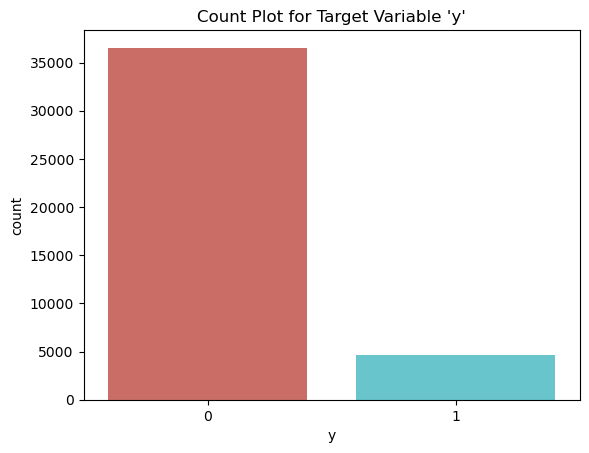

In [102]:
# Plot a count plot for the target variable
sns.countplot(x='y', data=data, palette='hls')  
plt.title("Count Plot for Target Variable 'y'")
plt.show()

In [103]:
# Replace ... with your code
# Display value counts for the target variable
y_value_counts = data["y"].value_counts()
print("Value counts for the target variable 'y':")
print(y_value_counts)

Value counts for the target variable 'y':
y
0    36548
1     4640
Name: count, dtype: int64


In [104]:
# Replace ... with your code
# Calculate subscription statistics
count_no_sub = y_value_counts[0]
count_sub = y_value_counts[1]

pct_of_no_sub = y_value_counts[0] / y_value_counts.sum()
pct_of_sub = y_value_counts[1] / y_value_counts.sum()

print(f"Percentage of no subscription: {pct_of_no_sub * 100:.2f}%")
print(f"Percentage of subscription: {pct_of_sub * 100:.2f}%")

Percentage of no subscription: 88.73%
Percentage of subscription: 11.27%


In [105]:
# Replace ... with your code
# Display the mean of numeric columns grouped by the target variable
grouped_means = data.select_dtypes([np.number]).groupby(by=["y"]).mean()
grouped_means


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [106]:
grader.check("task3")

task3 results: All test cases passed!

**Based on the outputs above, what are some observations? Please share some of your findings.**

**Observations:**  
- Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.  
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.  
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.  




## 4. **Create dummy variables**  
In this section, we will learn how to transform categorical variables into dummy variables, which are binary representations. **The codes in this section are provided and no modification is required.** Dummy variables are essential for preparing data for machine learning models that require numeric input.

**Example:**
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'green']
})

# Create dummy variables
dummy_df = pd.get_dummies(data['color'], prefix='color')

print(dummy_df)

```
**Output:**
```
   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True
4       False         True      False
```
**Explanation:**
* pd.get_dummies() takes the color column and creates a binary column for each unique category (blue, green, red).
* Each row has a True under the corresponding color and False for the rest. You can change the dtype to int so that it returns 1 and 0 for each column, for example:
  ```python
  dummy_df = pd.get_dummies(data['color'], prefix='color', dtype=int)
  ```
* The prefix='color' argument ensures that the dummy columns are prefixed with the word color.

This approach is widely used to convert categorical variables into a format suitable for machine learning models. To learn more about pd.get_dummies() and its usage, refer to the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).


In [107]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var, dtype = int) # by default, it returns True or False
    data1=data.join(cat_list)
    
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [108]:
data_final=data1[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype=object)

In [109]:
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,1,0


## 5. **Random Over-sampling the minority class**  
In this section, we will learn about over-sampling, which is the process of randomly duplicating observations from the minority class to achieve a balanced dataset.

The most common approach to over-sampling is to resample with replacement. Here's how to proceed:

- Import the necessary resampling module from Scikit-Learn.
- Split the data into training and testing sets using train_test_split.
- Separate the majority and minority classes in the training data.
- Upsample the minority class by randomly duplicating its samples.
- Combine the upsampled minority class with the majority class to create a balanced dataset.
- Split the data back into features (X_train) and target (y_train).
- Applied `StandardScaler` to standardize both training and testing features to get `X_train_scaled` and `X_test_scaled`.

In [110]:
# import resample module and Scaler 
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [111]:
# Replace ... with your code
# Split data into X and y
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]

# Split data into training and testing sets using train_test_split
X_train_bef, X_test, y_train_bef, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 

# Combine X_train and y_train
train_data = pd.concat([X_train_bef, y_train_bef], axis=1) 

In [112]:
# Replace ... with your code
# Separate majority and minority classes
# majority: train data with y == 0, minority: train data with y == 1
majority = data.groupby(["y"]).get_group(0)
minority = data.groupby(["y"]).get_group(1)

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,   # Sample with replacement
                              n_samples=len(majority),  # Match majority class size
                              random_state=0)  # Reproducibility

In [114]:
# Replace ... with your code
# Combine majority and upsampled minority
upsampled_data = majority
upsampled_data.add(minority_upsampled)

# Split back into features and target
X_train = upsampled_data[upsampled_data.columns[:-1]]
y_train = upsampled_data[upsampled_data.columns[-1:]]

In [119]:
# Replace ... with your code
# Scale features in X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train)
X_test_scaled = scaler.fit(X_test)

ValueError: could not convert string to float: 'blue-collar'

In [ ]:
grader.check("task5")

**Note:** You may have noticed that the over-sampling was performed only on the training data. This is important because by over-sampling only the training set, we ensure that no information from the test data is used to create synthetic observations. This prevents any potential data leakage, where information from the test set might influence the model training process.

---
Random over-sampling is a straightforward yet powerful technique for addressing class imbalance. However, it can sometimes lead to overfitting, as the model may memorize duplicated samples rather than learning to generalize effectively. To mitigate this, consider combining random over-sampling with more sophisticated approaches like SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples instead of duplicating existing ones. you can explore a variety of techniques and strategies in future projects when dealing with imbalanced data. Below are some popular methods for addressing class imbalance:

### Alternative Resampling Techniques:

**Under-sampling the Majority Class:** This involves reducing the number of samples in the majority class to match the size of the minority class. While it can balance the dataset, it risks discarding potentially valuable information from the majority class.

**SMOTE (Synthetic Minority Over-sampling Technique):** Unlike random over-sampling, SMOTE creates synthetic samples for the minority class by interpolating between existing samples. This helps to reduce the risk of overfitting.

**ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE, ADASYN focuses on generating more synthetic samples in regions where the minority class is under-represented, improving the classifier's performance on difficult-to-learn samples.

**Cluster-based Over-sampling:** Groups data into clusters before over-sampling the minority class within each cluster, ensuring better representation and diversity of the synthetic samples.

## 6. **Logistic Regression Model Fitting**
In this section, we will fit a logistic regression model to the training data and evaluate its performance on the test data. 

### Instructions
- Instantiate the logistic regression model using `LogisticRegression()`.
- Train the model using the `fit` method on the training data (`X_train_scaled` and `y_train`).
- Make predictions on the test data (`X_test_scaled`) using the `predict` method.
- Calculate the model's accuracy on test data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Replace ... with your code
# Instantiate the logistic regression model
logreg = ...

# Fit the model to the training data
...

# Make predictions on the test and display the accuracy
y_pred = ...

# Calculate and display the accuracy
accuracy = ...
print(f'Accuracy of logistic regression classifier on test set: {accuracy:.2f}')

In [ ]:
grader.check("task6")

## **7. Grid Searching for selecting hyperparameters**

Our initial logistic regression model achieved an accuracy of approximately 85%, which was a promising start. To further explore potential improvements, we will conduct a grid search to fine-tune the hyperparameters of the model.

A **grid search** systematically tests combinations of hyperparameter values to determine the best-performing model. In this case, we'll focus on two hyperparameters of the logistic regression model:
1. **Penalty**: Regularization technique used to avoid overfitting.
2. **C**: Inverse of regularization strength (smaller values specify stronger regularization).

### **Instructions**
- Combine the hyperparameter lists of `penalty` and `C` into a dictionary using `dict()`, with keys as hyperparameter names and values as the corresponding lists.
- Instantiate `GridSearchCV` with the attributes set as `estimator = lgr`, `param_grid = param_grid` and store this instance in the `grid_search` variable
- Fit `GridSearchCV` with the training data (`X_train_scaled`, `y_train`).
- Access the best hyperparameter combination using `.best_params_`, the best score using `.best_score_`, and the best model using `.best_estimator_`
- Evaluate the final model on the test set using `confusion_matrix` and `classification_report`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Replace ... with your code
# Define hyperparameter grid
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.01, 0.1, 1, 10]

# Combine the lists into a dictionary
hyperparameters = ...

# Create logistic regression model
lgr = ...

# Use GridSearch
grid_search = ...

# Fit the model
...

In [ ]:
# Best parameters, score (accuracy by default) and best model
best_params = ...
best_score = ...
best_model = ...

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best Model:", best_model)

In [ ]:
# Evaluate the final model
y_pred = ...
conf_matrix = ...
classification_rpt = ...

print("Confusion Matrix:\n", conf_matrix)  
print("Classification Report:\n", classification_rpt)

In [ ]:
grader.check("task7")

The results indicated that the optimized hyperparameters did not yield a significant improvement in performance. This outcome suggests that the default hyperparameters for logistic regression were already well-suited for the given dataset. Alternatively, it could indicate that other factors, such as the data quality, feature selection, or the nature of the problem, might play a more critical role in improving the model's performance.

This exercise reinforces the importance of testing and validating assumptions during the model optimization process. While hyperparameter tuning is a valuable tool, it is not always guaranteed to lead to better results.

### Introduction to Confusion Matrix and Classification Metrics

A **confusion matrix** is a performance evaluation tool for classification models. It provides detailed insights into how well a classification algorithm performs, breaking down predictions into four categories:

|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|-------------------------|-------------------------|
| **Actual Positive** | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)     | True Negative (TN)      |

---

### Key Terms in the Confusion Matrix
1. **True Positive (TP)**: The model correctly predicted a positive outcome.
2. **True Negative (TN)**: The model correctly predicted a negative outcome.
3. **False Positive (FP)**: The model predicted positive when it is actually negative (Type I error).
4. **False Negative (FN)**: The model predicted negative when it is actually positive (Type II error).

---

### How to Calculate and Interpret Metrics
Using the values from the confusion matrix, you can derive important classification metrics:

#### 1. **Accuracy** 
   - **Formula**:  
     
     $${Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
     
   - **Interpretation**: The percentage of all predictions (positive and negative) that are correct.
   - **Limitation**: Can be misleading for imbalanced datasets (e.g., when one class dominates).

#### 2. Precision (Positive Predictive Value)  
   - **Formula**:  
     
     $${Precision} = \frac{TP}{TP + FP}$$
    
   - **Interpretation**: Of all instances predicted as positive, how many are actually positive.
   - **Importance**: High precision reduces false positives.

#### 3. Recall (Sensitivity or True Positive Rate)  
   - **Formula**:  
   
     $${Recall} = \frac{TP}{TP + FN}$$
  
   - **Interpretation**: Of all actual positives, how many were correctly predicted.
   - **Importance**: High recall reduces false negatives.

#### 4. F1-Score (Harmonic Mean of Precision and Recall) 
   - **Formula**:  
    
     $${F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
    
   - **Interpretation**: A balanced metric that considers both precision and recall. Useful for imbalanced datasets.

---

### Evaluating Model Performance
- **Single Accuracy**:
  - Simpler but less informative for imbalanced datasets.
  - Example: If 90% of data belongs to one class, a model predicting only that class achieves 90% accuracy without identifying any minority-class samples.

- **Confusion Matrix**:
  - Provides a detailed breakdown of correct and incorrect predictions.
  - Helps calculate additional metrics like precision, recall, and F1-score to better evaluate model performance in complex scenarios.

---

### Example of Imbalanced Dataset
- Dataset: 100 samples, 95 negatives, 5 positives.
- Model predicts all negatives:
  - Accuracy: 95% (good score).
  - Recall: 0% for the positive class (poor performance).
  
Using only accuracy hides the model's inability to predict the minority class.

---

A **confusion matrix** and derived metrics like **precision**, **recall**, and **F1-score** provide a more comprehensive view of model performance than accuracy alone, especially in cases with imbalanced datasets or when certain types of errors (e.g., false positives or false negatives) are more costly.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)